# Pandas: all plotting examples

### Getting the data for plotting

In [33]:
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
import pandas as pd
from pandas_datareader import data
from datetime import datetime as dt

In [110]:
tickers = ['AAPL', 'MSFT', 'FB']
start_date = '2018-01-01'
end_date = '2019-06-04'
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [111]:
print(panel_data.columns.get_level_values(0).unique())
print(panel_data.columns.get_level_values(1).unique())
idx = pd.IndexSlice
panel_data.Close.tail()

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object', name='Attributes')
Index(['AAPL', 'FB', 'MSFT'], dtype='object', name='Symbols')


Symbols,AAPL,FB,MSFT
Date,,,
2019-05-29,177.38,182.19,124.94
2019-05-30,178.30,183.01,125.73
2019-05-31,175.07,177.47,123.68
2019-06-03,173.30,164.15,119.84
2019-06-04,179.64,167.50,123.16


## Plotting Series

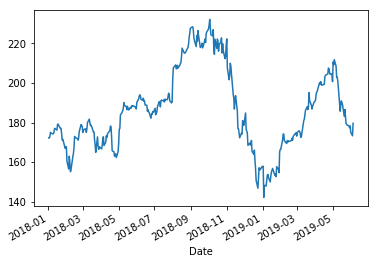

In [102]:
panel_data.loc[:, ('Close', 'AAPL')].plot.line()

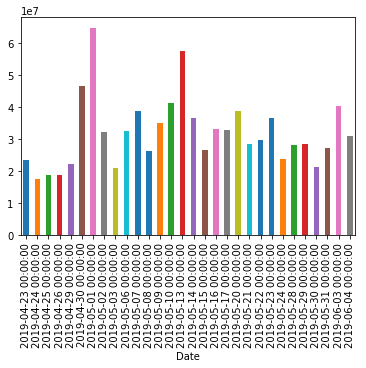

In [103]:
panel_data.loc[:, ('Volume', 'AAPL')].iloc[-30:].plot.bar()

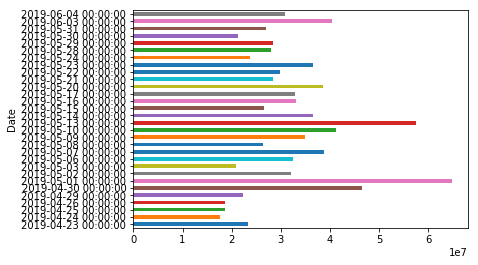

In [104]:
panel_data.loc[:, ('Volume', 'AAPL')].iloc[-30:].plot.barh()

Attributes  Symbols
High        AAPL      177.92
Low         AAPL      170.27
Open        AAPL      175.60
Close       AAPL      173.30
Name: 2019-06-03 00:00:00, dtype: float64

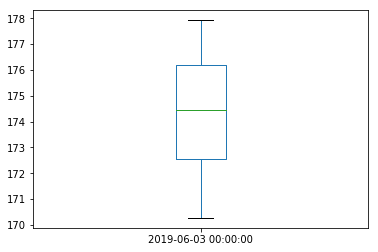

In [112]:
panel_data.loc[dt(2019,6,3), (slice('High', 'Close'), 'AAPL')].plot.box()
panel_data.loc[dt(2019,6,3), (slice('High', 'Close'), 'AAPL')]

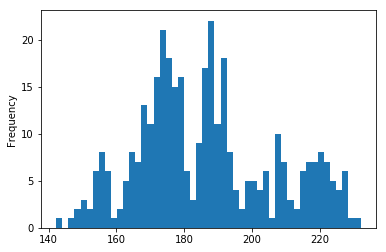

In [106]:
panel_data.loc[:, ('Close', 'AAPL')].plot.hist(bins=50)

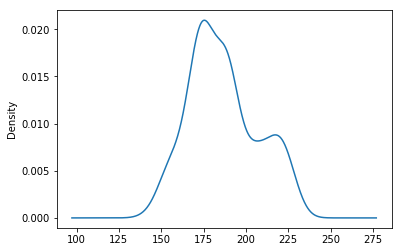

In [61]:
panel_data.loc[:,('Close','AAPL')].plot.kde()

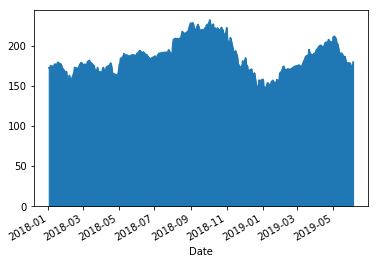

In [107]:
panel_data.loc[:, ('Close', 'AAPL')].plot.area()

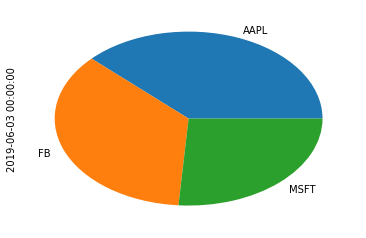

In [113]:
panel_data.loc[dt(2019,6,3), 'Close'].plot.pie()

## Plotting DataFrame

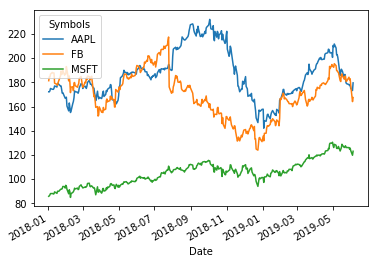

In [114]:
panel_data.loc[:, 'Close'].plot.line()

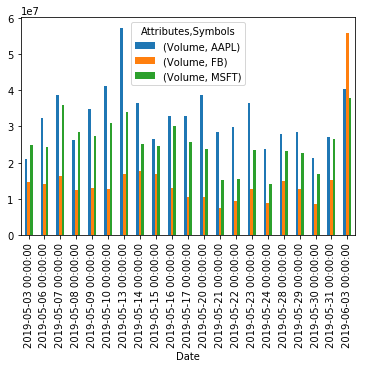

In [115]:
panel_data.loc[dt(2019,5,3):dt(2019,6,3),('Volume','AAPL'):('Volume','MSFT')].plot.bar()

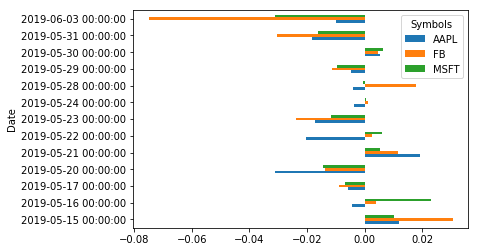

In [117]:
panel_data.pct_change().loc[dt(2019,5,15):dt(2019,6,3),'Close'].plot.barh()

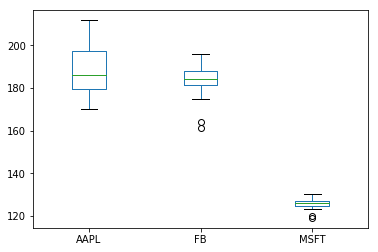

In [118]:
panel_data.loc[dt(2019,5,3):dt(2019,6,3), 'High':'Close'].stack(0).plot.box()

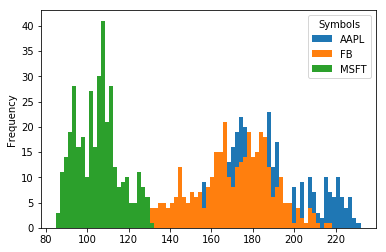

In [120]:
panel_data.loc[:, 'Close'].plot.hist(bins=75)

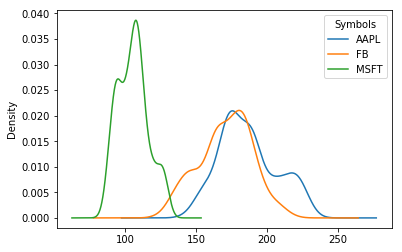

In [121]:
panel_data.loc[:, 'Close'].plot.kde()

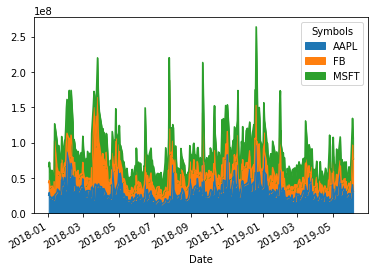

In [124]:
panel_data.loc[:, 'Volume'].plot.area()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6B5829518>,
      dtype=object)

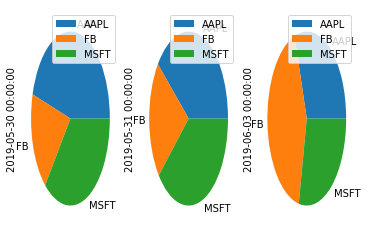

In [131]:
panel_data.loc[dt(2019,5,30):dt(2019,6,3), 'Volume'].T.plot.pie(subplots=True)

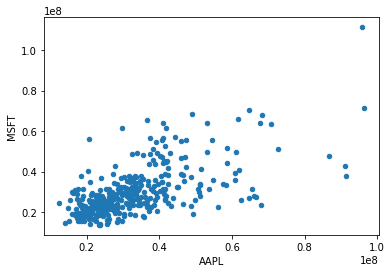

In [133]:
panel_data.loc[:, 'Volume'].plot.scatter(x='AAPL', y='MSFT')

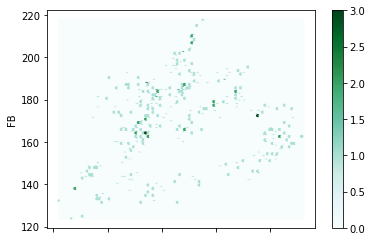

In [138]:
panel_data.loc[:, 'Close'].plot.hexbin(x='AAPL', y='FB')

## Pandas plotting

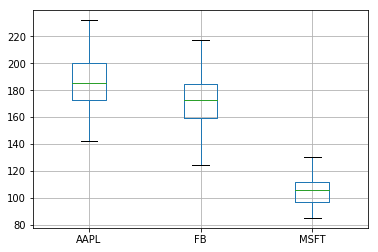

In [142]:
pd.plotting.boxplot(panel_data['Close'])

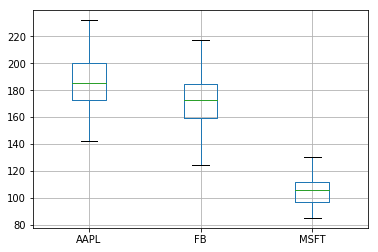

In [145]:
pd.plotting._core.boxplot_frame(panel_data['Close'])

AAPL         AxesSubplot(0.1,0.559091;0.363636x0.340909)
FB      AxesSubplot(0.536364,0.559091;0.363636x0.340909)
MSFT             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

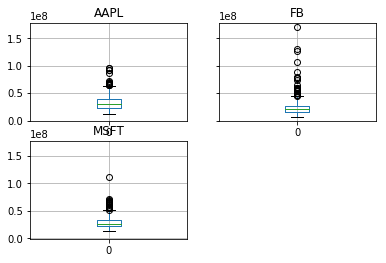

In [156]:
pd.plotting._core.boxplot_frame_groupby(panel_data.unstack().loc['Volume'].reset_index().groupby('Symbols'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6BDB19F28>,
      dtype=object)

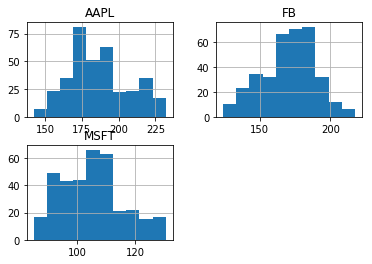

In [157]:
pd.plotting._core.hist_frame(panel_data['Close'])

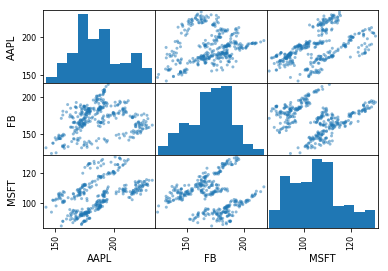

In [198]:
plot = pd.plotting.scatter_matrix(panel_data['Close'])

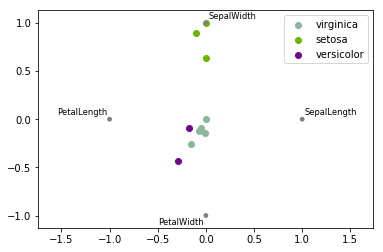

In [180]:
df = pd.DataFrame({
         'SepalLength': [6.5, 7.7, 5.1, 5.8, 7.6, 5.0, 5.4, 4.6,
                         6.7, 4.6],
         'SepalWidth': [3.0, 3.8, 3.8, 2.7, 3.0, 2.3, 3.0, 3.2,
                        3.3, 3.6],
         'PetalLength': [5.5, 6.7, 1.9, 5.1, 6.6, 3.3, 4.5, 1.4,
                         5.7, 1.0],
         'PetalWidth': [1.8, 2.2, 0.4, 1.9, 2.1, 1.0, 1.5, 0.2,
                        2.1, 0.2],
         'Category': ['virginica', 'virginica', 'setosa',
                      'virginica', 'virginica', 'versicolor',
                      'versicolor', 'setosa', 'virginica',
                      'setosa']
     })
plot = pd.plotting.radviz(df, 'Category')

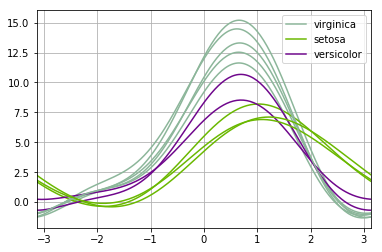

In [182]:
plot = pd.plotting.andrews_curves(df, 'Category')

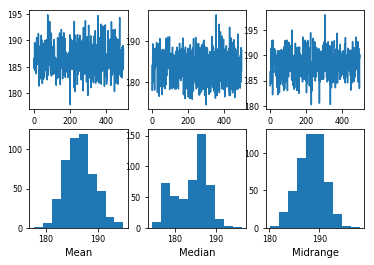

In [184]:
plot = pd.plotting.bootstrap_plot(panel_data[('Close','AAPL')])

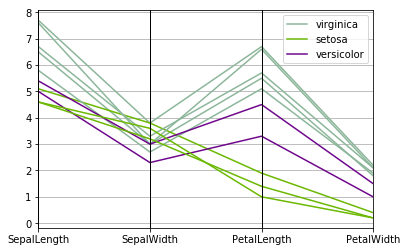

In [185]:
plot = pd.plotting.parallel_coordinates(df, 'Category')

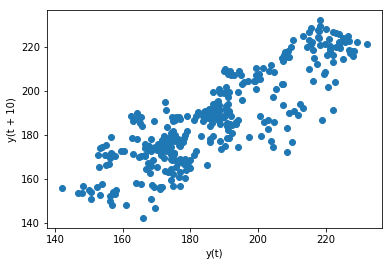

In [187]:
plot = pd.plotting.lag_plot(panel_data[('Close','AAPL')], lag=10)

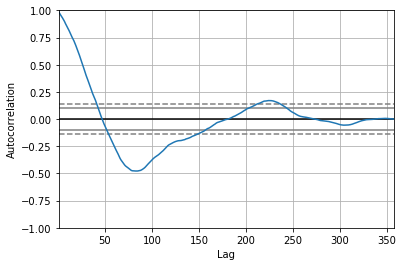

In [189]:
plot = pd.plotting.autocorrelation_plot(panel_data[('Close','AAPL')])

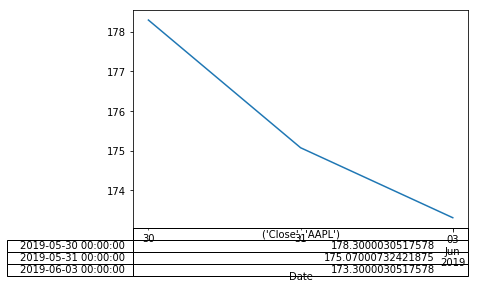

In [197]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
panel_data.loc[dt(2019,5,30):dt(2019,6,3),('Close','AAPL')].plot(ax=ax)
plot = pd.plotting.table(ax,panel_data.loc[dt(2019,5,30):dt(2019,6,3),('Close','AAPL')])